$$ min (4-2.1 x_1^2 + 1/3 x_1^4 ) x_1^2 + x_1x_2 + (-4 + 4x_2^2 )x_2^2 $$

$$ x_n(k + 1) = x_n(k) - a df(x(k))/dx_n, n = 1 ..N $$

$$ f(x) = 4x_1^2 -2.1x_1^4 + 1/3x_1^6 + x_1x_2 -4 x_2^2 + 4x_2^4  $$
  
$$ dx_1 = 8x_1 - 8.4x_1^3 + 2x_1^5 + x_2  $$
$$ dx_1 = 2(x_1^5 - 4.2x_1^3 + 4x_1 + 0.5x_2)  $$
  
$$dx_2 = x_1 - 8x_2 + 16x_2^3 $$
$$dx_2 = x_1+ 16x_2^3 - 8x_2 $$


In [20]:
def f(x1, x2):
    return (4 - 2.1 * x1**2 + (1/3) * x1**4) * x1**2 + x2 * x1 + (-4 + 4 * x2**2) * x2**2
#     return 4 * x1**2 - 2.1 * x1**4 + (1/3) * x1**6 + x2 * x1 -4 * x2 + 4 * x2**2) * x2**2
def dx1(x1, x2):
#     return 2 * 2 * x1 - 2.1* 4 * x1**3 + (1/3) * 6 * x1**5 + x2
    return 2 * ( 4 * x1 - 4.2 * x1**3 +  x1**5 + 0.5 * x2 )
def dx2(x1, x2):
    return x1 - 4 * 2 * x2 + 4 * 4 * x2**3

In [19]:
dx1(0.001,0) 

0.003999991600002

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [5]:
f(0,0)

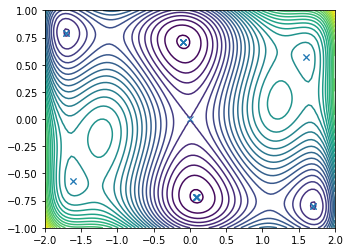

In [39]:
n = 100
x = np.linspace(-2, 2, n)
y = np.linspace(-1, 1, n)
 
X, Y = np.meshgrid(x, y)
# Z = np.sqrt(X**2 + Y**2)
Z = f(X, Y)
 
#
# meshgrid で作った X と Y、そして高さ Z を contour に渡す
#
plt.contour(X, Y, Z,40)

ax = plt.gca()
# ax.set_aspect('equal')
# ax.set_aspect((ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])  )
ax.set_aspect(1.5)
plt.plot([x[0] for x in xx], [x[1]for x in xx], 'x')
# plt.plot([x[0] for x in yy], [x[1]for x in yy], 'o')
# plt.plot([x[0] for x in point], [x[1]for x in point], 'o')
plt.show()

In [59]:
(ax.get_xlim()[1] - ax.get_xlim()[0]) / (ax.get_ylim()[1] - ax.get_ylim()[0])

2.0

In [64]:
print(f(0.08984, -0.71266))
print(f(-0.08984, 0.71266))

-1.0316284533608835
-1.0316284533608835


In [65]:
f(0,0)

0.0

最急降下法のアルゴリズム

講義資料で説明した最急降下法のアルゴリズムを以下に示す。

最急降下法

1. 更新幅 α,最大ステップ数 kmax,初期点 x(0) を与える。k = 0 として,手順 2 に進む。

2. 次式にしたがって,探索点 x を更新する。

xn(k + 1) = xn(k) − α

∂ f(x(k))

∂xn

, n = 1, . . . , N (2)

3. k = kmax であれば終了する。そうでなければ,k ← k + 1 として,手順 2 に戻る。

3 課題

Six-hump Camelback 関数最小化問題 (1) を最急降下法を用いて解き,講義資料で示した図と同じような

探索軌道を示しなさい。ただし,初期点は図 1 の端点 (−2, −1), (−2, −0.5), . . . , (−2, 1), (−1, −1), . . . , (2, 1)

の 25 点(講義資料参照)とする。ステップ幅は α = 0.01 を推奨する。最急降下法の実装には NumPy を

用い,結果(探索軌道)の出力には Matplotlib を用いること。

In [33]:
point = []
for x1 in np.arange(-2, 3, 1):
    for x2 in np.arange(-1,1.5,.5):
        point.append([x1, x2])
point

[[-2, -1.0],
 [-2, -0.5],
 [-2, 0.0],
 [-2, 0.5],
 [-2, 1.0],
 [-1, -1.0],
 [-1, -0.5],
 [-1, 0.0],
 [-1, 0.5],
 [-1, 1.0],
 [0, -1.0],
 [0, -0.5],
 [0, 0.0],
 [0, 0.5],
 [0, 1.0],
 [1, -1.0],
 [1, -0.5],
 [1, 0.0],
 [1, 0.5],
 [1, 1.0],
 [2, -1.0],
 [2, -0.5],
 [2, 0.0],
 [2, 0.5],
 [2, 1.0]]

In [35]:
dx = [dx1, dx2]
yy = []
xx = []
for px in point:
    y = []
    x = copy.deepcopy(px)
    print(x)
    for k in range(100):
        for n in range(2):
#             print(x)
            x[n] = (x[n] - 0.01 * dx[n](*x))
            y.append(x)
    print(x)
    xx.append(x)
#     break
#     print(np.array(y))
    yy.append(y)

[-2, -1.0]
[-1.6070857085715764, -0.56871054405942567]
[-2, -0.5]
[-1.6071381342718773, -0.56857100603003086]
[-2, 0.0]
[-1.7036067101994583, 0.7960835672394917]
[-2, 0.5]
[-1.703606714957657, 0.79608356866501362]
[-2, 1.0]
[-1.7036067150945449, 0.79608356870184205]
[-1, -1.0]
[0.089178565068401189, -0.71258579338060457]
[-1, -0.5]
[0.089110687081764464, -0.71257852933784249]
[-1, 0.0]
[-0.090576510215657643, 0.71273372066466267]
[-1, 0.5]
[-0.091321815865905653, 0.71281304177581428]
[-1, 1.0]
[-0.091640290792616874, 0.71284661184010278]
[0, -1.0]
[0.089820390809444206, -0.71265410798231421]
[0, -0.5]
[0.089801220315525246, -0.71265206149305838]
[0, 0.0]
[0.0, 0.0]
[0, 0.5]
[-0.089801220315525246, 0.71265206149305838]
[0, 1.0]
[-0.089820390809444206, 0.71265410798231421]
[1, -1.0]
[0.091640290792616874, -0.71284661184010278]
[1, -0.5]
[0.091321815865905653, -0.71281304177581428]
[1, 0.0]
[0.090576510215657643, -0.71273372066466267]
[1, 0.5]
[-0.089110687081764464, 0.71257852933784249]


In [27]:
dx1(0,0)

0.0

In [123]:
yy[0]

[[-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089708288519],
 [-1.8993223902460741, -0.52286089

In [97]:
dx[1](1,1)

9

In [69]:
xx

[array([-1.58789391, -0.58789391]),
 array([-0.67651902,  0.82348098]),
 array([-1.27544654,  0.72455346]),
 array([-1.70379174,  0.79620826]),
 array([ -1.55504993e-12,  -1.55504993e-12]),
 array([ 0.0994196,  0.5994196]),
 array([-0.23561008,  0.76438992]),
 array([-0.67651902,  0.82348098]),
 array([ 0.23561008, -0.76438992]),
 array([-0.0994196, -0.5994196]),
 array([ 0.,  0.]),
 array([ 0.0994196,  0.5994196]),
 array([ 1.27544654, -0.72455346]),
 array([ 0.67651902, -0.82348098]),
 array([ 0.23561008, -0.76438992]),
 array([-0.0994196, -0.5994196])]

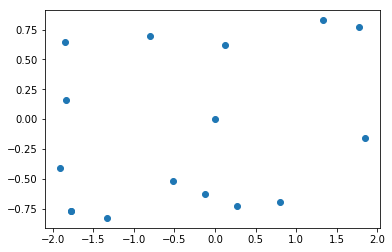

In [95]:
plt.plot([x[0] for x in xx], [x[1]for x in xx], 'o')
plt.show()

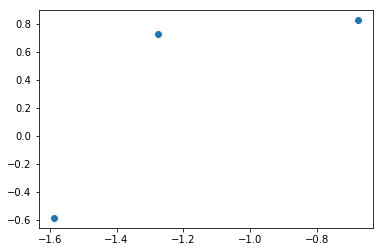

In [79]:
plt.plot([xx[0][0], xx[1][0], xx[2][0]], [xx[0][1], xx[1][1], xx[2][1]], 'o')
plt.show()